# Importing required modules

In [34]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc


#Visualization
from spacy import displacy
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings 
warnings.filterwarnings('ignore')

#model
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91879\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91879\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:
# Reading the Resume Dataset 
df = pd.read_csv("ResumeDataset.csv")
df.shape

(962, 2)

In [36]:
# Shuffle the dataset and take top 1000 records

df = df.reindex(np.random.permutation(df.index))
data = df.copy()
data


,Category,Resume
108,Arts,Education Details \r\nAugust 2018 to January 2...
168,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...
624,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
336,Java Developer,TECHNICAL STRENGTHS Computer Language Java/J2E...
...,...,...
770,Hadoop,Education Details \r\n\r\nHadoop Developer \r\...
209,Mechanical Engineer,* I'm hard working person. * I'm self confiden...
662,Network Security Engineer,"Technical Expertise: â¢ Cisco ASA, Checkpoint..."
262,Sales,KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...


In [37]:
print ("Displaying the distinct categories of resume - \n")
print (data['Category'].unique())

Displaying the distinct categories of resume - 

['Arts' 'Web Designing' 'DevOps Engineer' 'Data Science' 'Java Developer'
 'Civil Engineer' 'Hadoop' 'PMO' 'Network Security Engineer' 'Sales'
 'Operations Manager' 'SAP Developer' 'HR' 'Python Developer'
 'Electrical Engineering' 'Advocate' 'Business Analyst' 'ETL Developer'
 'Mechanical Engineer' 'Testing' 'Database' 'DotNet Developer'
 'Blockchain' 'Automation Testing' 'Health and fitness']


In [38]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -\n")
print (data['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Blockchain                   40
Mechanical Engineer          40
Sales                        40
Operations Manager           40
ETL Developer                40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

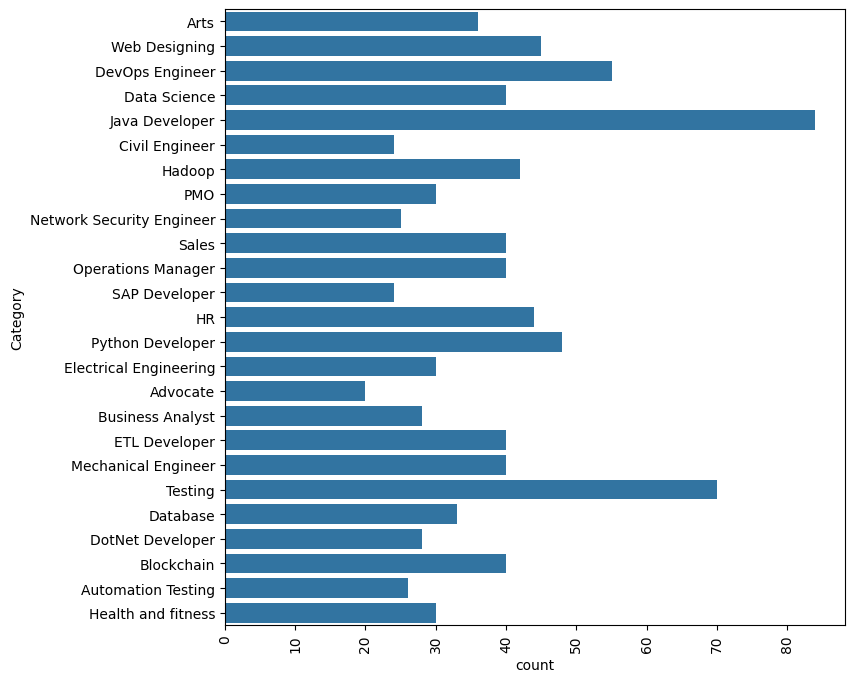

In [39]:
# Visualizing the Category count in data

import seaborn as sns
plt.figure(figsize=(8,8))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

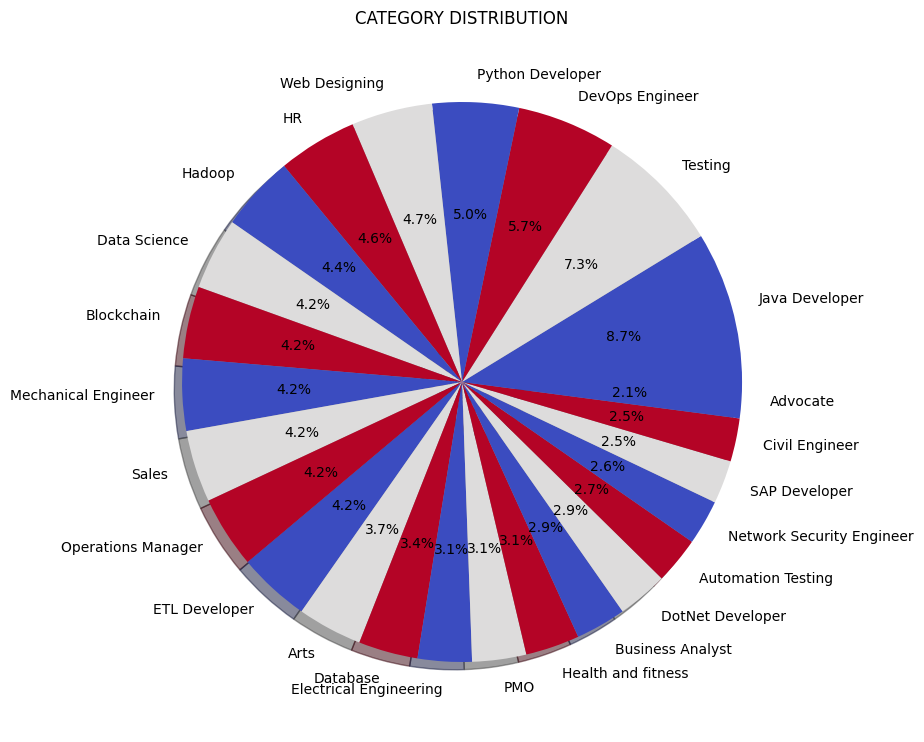

In [40]:
# Visualize the distibution of Categories

from matplotlib.gridspec import GridSpec

targetCounts = data['Category'].value_counts()
targetLabels  = targetCounts.keys()

# Make square figures and axes
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [41]:
# Function to clean the resume text by using vaious regular expressions

import re
def cleanResume(resumeText):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        resumeText,
    )
    review = re.sub('http\S+\s*', ' ', review)  # remove URLs
    review = re.sub('RT|cc', ' ',review )  # remove RT and cc
    review = re.sub('#\S+', '',review )  # remove hashtags
    review = re.sub('@\S+', '  ',review )  # remove mentions
    review = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ',review )  # remove punctuations
    review = re.sub(r'[^\x00-\x7f]',r' ', review) 
    review = re.sub('\s+', ' ', review ) # remove extra whitespace
    
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    
    return review
    

In [42]:
# Creating Clean_Resume column to store the cleaned text
data['Clean_Resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [43]:
data.head()

,Category,Resume,Clean_Resume
108,Arts,Education Details \r\nAugust 2018 to January 2...,education detail august 2018 january 2021 ente...
168,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...,education detail january 2016 b sc information...
624,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,skill visa b1 visa usa onsite visit sweden u s...
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...
336,Java Developer,TECHNICAL STRENGTHS Computer Language Java/J2E...,technical strength computer language java j2ee...


[('project', 617), ('exprience', 612), ('company', 532), ('detail', 530), ('month', 517), ('description', 462), ('data', 438), ('system', 328), ('skill', 322), ('1', 312), ('management', 301), ('team', 273), ('maharashtra', 267), ('6', 236), ('business', 221), ('client', 216), ('java', 213), ('developer', 211), ('year', 203), ('january', 202), ('database', 202), ('report', 201), ('engineering', 199), ('testing', 196), ('technology', 192), ('ltd', 189), ('requirement', 185), ('test', 181), ('pune', 180), ('application', 180), ('using', 179), ('service', 176), ('c', 167), ('customer', 162), ('pvt', 160), ('le', 157), ('development', 147), ('process', 147), ('design', 146), ('working', 146), ('sql', 138), ('responsibility', 137), ('education', 136), ('university', 133), ('work', 132), ('software', 131), ('activity', 129), ('technical', 128), ('various', 128), ('monthscompany', 125)]


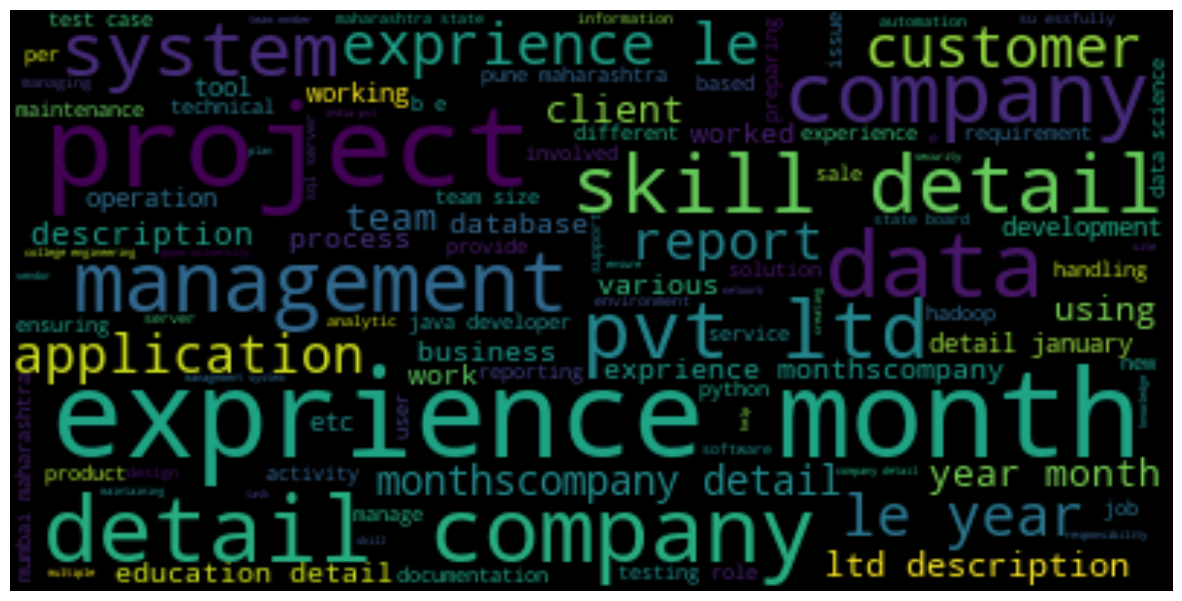

In [44]:
# Processes text data from the 'Clean_Resume' column of the dataset,
# Identifies the most common words, and generates a word cloud

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Clean_Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = Sentences[i]
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
# Define function to load jsonl file and extract the skill-patterns

import json

def load_jsonl(filename):
    d_list = []
    with open(filename, encoding='utf-8', mode='r') as in_f:
        print("Load Jsonl:", filename)
        for line in in_f:
            item = json.loads(line.strip())
            d_list.append(item)
    return d_list

skills = load_jsonl("skill_patterns.jsonl")

Load Jsonl: skill_patterns.jsonl


In [46]:
# Pre-processing the skill-pattern 

for i in range (len(skills)):
    skills[i]['label'] = 'SKILL'

In [47]:
skills

[{'label': 'SKILL', 'pattern': [{'TEXT': '.NET'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': ''}, {'LOWER': 'net'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': '1password'}]},
 {'label': 'SKILL', 'pattern': [{'TEXT': '3D'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': '3d'}, {'LOWER': 'reconstruction'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'aboutness'}]},
 {'label': 'SKILL',
  'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'data'}, {'LOWER': 'type'}]},
 {'label': 'SKILL',
  'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'interpretation'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'abstract'}, {'LOWER': 'machine'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'control'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'method'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'access'}, {'LOWER': 'network'}]},
 {'label': 'SKILL', 'pattern': [{'LOWER': 'accounting'}]},
 {'label': 'SKILL',
  'pattern': [{'LOWER': 'active'},
   {'LOWER': 'appearance'},

In [48]:
# Loads the English language model provided by spaCy.
# from spacy.cli import download
# download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

In [49]:
# Adds an entity ruler component to the spaCy pipeline
# Enabling named entity recognition (NER) based on custom rules.

ruler = nlp.add_pipe("entity_ruler")
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [50]:
#  Used to add skill-patterns to the entity ruler.
for skill in skills:
        ruler.add_patterns([skill])

In [51]:
# Extracts skills from a given text using spaCy's entity recognition
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_.startswith("SKILL"):
            subset.append(ent.text)
    myset.append(subset)
    return subset

# Returns unique skills
def unique_skills(x):
    return list(set(x))

In [52]:
# Processes the "Clean_Resume" column to extract and store unique skills for each resume
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,Category,Resume,Clean_Resume,skills
108,Arts,Education Details \r\nAugust 2018 to January 2...,education detail august 2018 january 2021 ente...,[]
168,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...,education detail january 2016 b sc information...,[design]
624,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,skill visa b1 visa usa onsite visit sweden u s...,"[devops, testing, python, server, software, me..."
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,"[data science, data structure, database, pytho..."
336,Java Developer,TECHNICAL STRENGTHS Computer Language Java/J2E...,technical strength computer language java j2ee...,"[oracle, database, testing, swift, middleware,..."


In [53]:
# Create a histogram to visualize the distribution of job categories
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [54]:
# Display the unique job categories in the data
Job_cat = data["Category"].unique()
Job_cat

array(['Arts', 'Web Designing', 'DevOps Engineer', 'Data Science',
       'Java Developer', 'Civil Engineer', 'Hadoop', 'PMO',
       'Network Security Engineer', 'Sales', 'Operations Manager',
       'SAP Developer', 'HR', 'Python Developer',
       'Electrical Engineering', 'Advocate', 'Business Analyst',
       'ETL Developer', 'Mechanical Engineer', 'Testing', 'Database',
       'DotNet Developer', 'Blockchain', 'Automation Testing',
       'Health and fitness'], dtype=object)

In [55]:
# Selecting a job category role for further matching 
Job_Category="Java Developer"

In [56]:
# Extracting total skills found in the data corresponding to the job category

Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

            
print(f"Skills required in {Job_Category} role : \n\n",unique_skills(Total_skills))

Skills required in Java Developer role : 

 ['mongodb', 'testing', 'functional testing', 'design', 'xcode', 'data system', 'sonarqube', 'server', 'security', 'eclipse', 'java', 'software', 'postman', 'medium', 'certificate', 'network security', 'database', 'jquery', 'sublime text', 'ionic', 'computer engineering', 'programming language', 'visual basic', 'collaboration', 'angularjs', 'support', 'hibernate', 'framework', 'oracle', 'computer science', 'middleware', 'deployment', 'knowledge base', 'documentation', 'business', 'angular', 'android', 'centos', 'maven', 'shell', 'ajax', 'workflow', 'atom', 'linux', 'engineering', 'swift', 'bootstrap', 'operating system', 'spring', 'web server', 'mysql', 'mobile', 'javascript', 'spring boot', 'application server', 'scripting language']


In [57]:
# Create a histogram to visualize the distribution of skills corresponding to the job category

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

Text(0.5, 1.0, 'Most Used Words in Java Developer Resume')

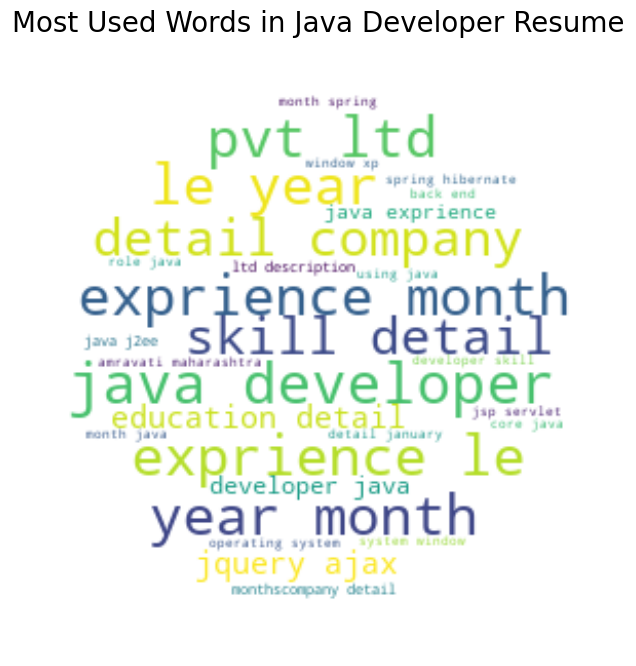

In [58]:
# Create a word cloud showing MOST used words in the corresponding job category

text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [59]:
# Count the frequencies of skills 
# Sort them in descending order.

from collections import Counter

skill_counts = Counter(Total_skills)
skill_freq_dict = dict(skill_counts)

sorted_skill_freq_dict = dict(sorted(skill_freq_dict.items(), key=lambda item: item[1], reverse=True))

print("Skill Frequencies:\n")
print(skill_freq_dict)

print("\nSorted Skill Frequencies:\n")
print(sorted_skill_freq_dict)

Skill Frequencies:

{'oracle': 12, 'database': 66, 'testing': 18, 'swift': 6, 'middleware': 12, 'operating system': 42, 'xcode': 6, 'documentation': 6, 'mysql': 36, 'business': 24, 'eclipse': 36, 'server': 12, 'support': 12, 'shell': 6, 'java': 78, 'software': 42, 'jquery': 24, 'hibernate': 60, 'spring': 48, 'web server': 6, 'ajax': 30, 'medium': 6, 'certificate': 6, 'sublime text': 6, 'programming language': 18, 'angularjs': 6, 'angular': 24, 'atom': 6, 'bootstrap': 12, 'javascript': 42, 'spring boot': 6, 'computer science': 6, 'linux': 12, 'engineering': 18, 'functional testing': 6, 'framework': 18, 'design': 12, 'sonarqube': 6, 'centos': 6, 'mobile': 6, 'data system': 6, 'android': 6, 'security': 12, 'ionic': 12, 'computer engineering': 12, 'mongodb': 6, 'maven': 6, 'application server': 6, 'scripting language': 6, 'workflow': 6, 'deployment': 6, 'knowledge base': 6, 'collaboration': 6, 'postman': 6, 'network security': 6, 'visual basic': 6}

Sorted Skill Frequencies:

{'java': 78, 

In [60]:
# Display top N skills from the sorted skill frequency dictionary

import itertools

N = 25
top_skills = dict(itertools.islice(sorted_skill_freq_dict.items(), N)) 
top_skills_req = list(top_skills.keys())
print(f"Top {N} skills required in {Job_Category} role :\n\n",top_skills_req)

Top 25 skills required in Java Developer role :

 ['java', 'database', 'hibernate', 'spring', 'operating system', 'software', 'javascript', 'mysql', 'eclipse', 'ajax', 'business', 'jquery', 'angular', 'testing', 'programming language', 'engineering', 'framework', 'oracle', 'middleware', 'server', 'support', 'bootstrap', 'linux', 'design', 'security']


In [61]:
# Data Science, Data Analytics

# Skills:
# Proficient in Python and R programming languages.
# Experienced in machine learning techniques such as regression, classification, and dimensionality reduction.
# Skilled in deep learning methodologies including multilayer perceptron, CNN, and LSTM.
# Familiar with natural language processing (NLP) concepts such as sentiment analysis.
# Competent in data analysis and exploratory data analysis (EDA) techniques.
# Experienced in visualization tools like Tableau for data presentation.
# Knowledgeable in database management with MySQL.
# Proficient in computer vision and image processing techniques.
# Familiarity with time series analysis and survival analysis.
# Experienced in optimization algorithms and decision tree methodologies.
# Competent in Flask for web development and NLP applications.
# Proficient in using numpy for numerical computing tasks.
# Skilled in Java programming language for various applications.
# Competent in implementing algorithms and data structures.
# Familiar with sentiment analysis techniques and their application.
# Experienced in programming language theory and implementation.
# Knowledgeable in dimensionality reduction techniques for data preprocessing and feature selection.

# Experience:

# Summer Project Intern
# Indian Institute of Technology Kharagpur
# Aug, 21'–
# Under the guidance of Professor C.S Kumar, Mechanical Engineering

# Worked on a Machine Learning project
# Applied Regression and Classification techniques
# Leveraged Dimensionality Reduction techniques
# Explored Deep Learning models
# Projects:

# 2.5D Visual Sound
# Feb–June, 21'
# Implemented a deep learning model to convert common monaural audio into binaural audio by leveraging video.

# Hybrid Image Formation
# Feb, 21'
# Implemented hybrid image formation, which changes interpretation with viewing distance.

# Harris Corner Detection and SIFT
# Mar, 21'
# Utilized Harris Corner detector and SIFT for locating interest points on an image.

# Hough Line and Circle Detector
# Apr, 21'
# Implemented Hough Line and Circle detection techniques.

# Fundamental Matrix using RANSAC
# May, 21'
# Improved image matching by leveraging epipolar geometry and applying RANSAC.

# Zomato Restaurants Data Analysis
# Sept–Dec, 20'
# Analyzed the best restaurants across cities in India.

# Player Data of FIFA21 Game Analysis
# Nov–Dec, 20'
# Analyzed player performance stats.

# Bankruptcy Data Analysis
# Mar–Apr, 21'
# Analyzed bankruptcy data and used LDA to discriminate bankrupt and non-bankrupt firms.

# Education:

# M.Sc. in Big Data Analytics
# Rabindra Bharati University
# 2020-Present
# GPA: 7.67

# B.Sc. in Mathematics
# Presidency University
# 2017–2020
# CGPA: 7.05

# Higher Secondary
# Jodhpur Park Boys’ School
# 2015–2017
# Marks: 84.2%

# Secondary
# Jodhpur Park Boys’ School
# 2005–2015

# Custom Resume

In [62]:
input_resume="""
SACHIN NAKATE
Ó +91-9665867691 R sachinnakate1207@gmail.com ° Linkedin  Github Ã LeetCode  codechef
EDUCATION
VIIT PUNE (2021 – 2025)
B.Tech Computer Engineering- CGPA - 8.6 Pune, Maharashtra
K.S.B PATIL MAHAVIDYALAYA , ANGAR (2019)
SSC- Percentage - 93% Angar, Maharashtra
K.S.B PATIL MAHAVIDYALAYA , ANGAR (2021)
HSC - Percentage - 90.86% Angar, Maharashtra
PROJECTS
Password Generator W |JavaScript, HTML, CSS (07-2022)
• Create strong, customized passwords with our app. Choose character sets and strength options for security
tailored to your needs. Easily generate secure passwords for all your accounts.
Social Media Database Management W |JDBC, HTML, CSS (01-2023)
• Developed a MySQL-based social media DBMS using JDBC.Designed an user-friendly frontend using
HTML/CSS.Features: User accounts, question posting, answering, and user-following features
Invoice Processing SystemW | React, Spring Boot, Hibernate, MySQL (08-2023)
• The Invoice Processing App is built on React for the frontend and Spring Boot for the backend, with
Hibernate and MySQL for data management. Seamlessly integrating these technologies, it offers a robust and
scalable solution for invoice processing. With its modular architecture, the project is easily extendable to
accommodate future requirements.
Machine Learning Algorithms used for Prediction of Lung CancerW | Research Paper (01-2024)
• An analysis of the performance of Machine Learning algorithms for prediction of lung cancer. Conducted
comprehensive analysis on machine learning algorithms for lung cancer prediction, highlighting significance of
early detection using Kaggle dataset
TECHNICAL SKILLS
Languages: Core Java, JavaScript
Development: Spring boot, Hibernate, React
Developer Tools: Linux, Github, VS Code, Power BI, Tableau
Course Work: DSA, Operating System, DBMS, OOPS, Machine Learning, Cloud Computing.
ACHIEVEMENTS
Leetcode: sachinnakaterider (100+ Problems)
Codeshef: sachinnakate97 - Highest Ranking: 1019
Published Research Paper at IEEE Explorer through ICIMIA 2023 Conference
INTERPERSONAL ATTRIBUTES
• Problem Solving
• Team player
• Design Thinking
• Intellectual Curiosity
• Communication
• Project Management
• Vision
• Adaptable
POSITION OF RESPONSIBILITY
Entrepreneurship Development Cell (EDC-VIIT) (11-2022) – Present
Head of Sales and BD Pune , Maharashtra
• Formulated Comprehensive Sales & Publicity techniques for Pune’s largest E-Summit, made over 250+ Sales
Deals in across 20+ Colleges,Finalized deals with companies like Starbucks, RedBull



"""

In [63]:
# Clean the input resume using defined function
cleaned_input = cleanResume(input_resume)
cleaned_input

'sachin nakate 91 9665867691 r sachinnakate1207 com linkedin github leetcode codechef education viit pune 2021 2025 b tech computer engineering cgpa 8 6 pune maharashtra k b patil mahavidyalaya angar 2019 ssc percentage 93 angar maharashtra k b patil mahavidyalaya angar 2021 hsc percentage 90 86 angar maharashtra project password generator w javascript html cs 07 2022 create strong customized password app choose character set strength option security tailored need easily generate secure password ounts social medium database management w jdbc html cs 01 2023 developed mysql based social medium dbms using jdbc designed user friendly frontend using html cs feature user ounts question posting answering user following feature invoice processing systemw react spring boot hibernate mysql 08 2023 invoice processing app built react frontend spring boot backend hibernate mysql data management seamlessly integrating technology offer robust scalable solution invoice processing modular architecture

In [64]:
# Display each named entity along with its entity label detected in the text 

dcm = nlp(cleaned_input)

for ent in dcm.ents:
       print(f"{ent.text} - Label: {ent.label_}")

nakate 91 - Label: PERSON
github - Label: SKILL
pune - Label: GPE
2021 2025 - Label: DATE
computer engineering - Label: SKILL
cgpa - Label: PERSON
8 6 - Label: DATE
pune maharashtra k b patil mahavidyalaya - Label: ORG
2019 - Label: DATE
93 - Label: CARDINAL
2021 - Label: DATE
90 86 - Label: DATE
maharashtra - Label: NORP
javascript - Label: SKILL
07 2022 - Label: DATE
security - Label: SKILL
medium - Label: SKILL
database - Label: SKILL
w jdbc html cs 01 2023 - Label: PERSON
mysql - Label: SKILL
medium - Label: SKILL
react - Label: SKILL
spring boot - Label: SKILL
hibernate - Label: SKILL
mysql - Label: SKILL
08 2023 - Label: DATE
react - Label: SKILL
spring boot - Label: SKILL
hibernate - Label: SKILL
mysql - Label: SKILL
data management - Label: SKILL
machine learning - Label: SKILL
algorithm - Label: SKILL
01 2024 - Label: DATE
machine learning - Label: SKILL
algorithm - Label: SKILL
machine learning - Label: SKILL
algorithm - Label: SKILL
java - Label: SKILL
javascript - Label: SK

In [65]:
# Add patterns to the entity ruler to recognize entities corresponding to the job categories.
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [66]:
# Set up colors and options for rendering entities

colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(cleaned_input)
displacy.render(sent, style="ent", jupyter=True, options=options)

In [67]:
# Generates a dependency parse visualization for the first 10 tokens of the processed text
# Is helpful for understanding the grammatical structure and dependencies within the text.

displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

In [68]:
# Display top N skills required for the job category role

print(f"Top {N} skills required for {Job_Category} role : ")
top_skills_req

Top 25 skills required for Java Developer role : 


['java',
 'database',
 'hibernate',
 'spring',
 'operating system',
 'software',
 'javascript',
 'mysql',
 'eclipse',
 'ajax',
 'business',
 'jquery',
 'angular',
 'testing',
 'programming language',
 'engineering',
 'framework',
 'oracle',
 'middleware',
 'server',
 'support',
 'bootstrap',
 'linux',
 'design',
 'security']

In [69]:
# Calculate the percentage score of required skills present in the resume

import itertools

resume_skills = unique_skills(get_skills(cleaned_input))
N = len(resume_skills)

req_skills_dict = dict(itertools.islice(sorted_skill_freq_dict.items(), N)) 
req_skills = list(req_skills_dict.keys())

score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)

match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 31.6% matched to your requirements


In [70]:
# Display input resume skills and required skills

print("Resume Skills : \n",resume_skills,"\n")
print(f"Required Skills for {Job_Category} : \n",req_skills)

Resume Skills : 
 ['design', 'ranking', 'security', 'java', 'medium', 'database', 'computer engineering', 'tableau', 'machine learning', 'react', 'project management', 'hibernate', 'github', 'algorithm', 'operating system', 'mysql', 'javascript', 'spring boot', 'data management'] 

Required Skills for Java Developer : 
 ['java', 'database', 'hibernate', 'spring', 'operating system', 'software', 'javascript', 'mysql', 'eclipse', 'ajax', 'business', 'jquery', 'angular', 'testing', 'programming language', 'engineering', 'framework', 'oracle', 'middleware']


# Classifier

In [71]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Retrieve unique labels from the "Category" column
labels = data['Category'].unique()

# Fit the LabelEncoder to these labels
le.fit(labels)

LabelEncoder()

In [72]:
# Encode the categories into numerical values using LabelEncoder
data["Label"] = le.fit_transform(data["Category"])

In [73]:
data.head()

,Category,Resume,Clean_Resume,skills,Label
108,Arts,Education Details \r\nAugust 2018 to January 2...,education detail august 2018 january 2021 ente...,[],1
168,Web Designing,Education Details \r\nJanuary 2016 B.Sc. Infor...,education detail january 2016 b sc information...,[design],24
624,DevOps Engineer,Skills VISA B1-VISA (USA) Onsite Visits to Swe...,skill visa b1 visa usa onsite visit sweden u s...,"[devops, testing, python, server, software, me...",8
14,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,"[data science, data structure, database, pytho...",6
336,Java Developer,TECHNICAL STRENGTHS Computer Language Java/J2E...,technical strength computer language java j2ee...,"[oracle, database, testing, swift, middleware,...",15


In [74]:
# Prepare data for machine learning by converting it into TF-IDF feature vectors
# Splitting it into training and testing sets.

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = data['Clean_Resume'].values
requiredTarget = data['Label'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [75]:
# Initializes OneVsRestClassifier with a KNN classifier as the base estimator 
clf = OneVsRestClassifier(KNeighborsClassifier())

# Trains the classifier using the provided training data
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [76]:
# Make predictions on the testing data 
prediction = clf.predict(X_test)

In [77]:
# Display performance of the classifier on both the training and testing data

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.

In [78]:
# Save the trained classifier

import joblib
joblib.dump(clf, 'model.joblib')

['model.joblib']

In [79]:
# Previously cleaned input resume
cleaned_input

'sachin nakate 91 9665867691 r sachinnakate1207 com linkedin github leetcode codechef education viit pune 2021 2025 b tech computer engineering cgpa 8 6 pune maharashtra k b patil mahavidyalaya angar 2019 ssc percentage 93 angar maharashtra k b patil mahavidyalaya angar 2021 hsc percentage 90 86 angar maharashtra project password generator w javascript html cs 07 2022 create strong customized password app choose character set strength option security tailored need easily generate secure password ounts social medium database management w jdbc html cs 01 2023 developed mysql based social medium dbms using jdbc designed user friendly frontend using html cs feature user ounts question posting answering user following feature invoice processing systemw react spring boot hibernate mysql 08 2023 invoice processing app built react frontend spring boot backend hibernate mysql data management seamlessly integrating technology offer robust scalable solution invoice processing modular architecture

In [80]:
# Transform cleaned input text into TF-IDF feature vectors for prediction 

custom_features = word_vectorizer.transform([cleaned_input])

print("Shape of custom features:", custom_features.shape)

Shape of custom features: (1, 1500)


In [81]:
# Predict class label for the input resume using the classifier
# Return the predicted class label in their original categorical form

pred = clf.predict(custom_features)
pred_class = le.inverse_transform(pred)

print(f"Your resume matches the '{pred_class[0]}' job category.")

Your resume matches the 'Data Science' job category.


# Ranking multiple resumes matching JD

In [82]:
# Reading the test resumes dataset

test_ds = pd.read_csv('Test_Resumes.csv')
test_ds

,Category,Resume_text
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U..."
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US..."
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow..."
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,..."
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,..."


In [83]:
# Cleaning the resume text and storing in separate column

test_ds["Cleaned_text"] = test_ds.Resume_text.apply(lambda x : cleanResume(x))
test_ds

,Category,Resume_text,Cleaned_text
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...


In [84]:
# Extracting skills from cleaned resume text and storing unique skills in 'skills' column

test_ds["skills"] = test_ds["Cleaned_text"].str.lower().apply(get_skills)
test_ds["skills"] = test_ds["skills"].apply(unique_skills)
test_ds

,Category,Resume_text,Cleaned_text,skills
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[testing, postgresql, design, scalability, ecl..."
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[exploratory data analysis, testing, python, d..."
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]"
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[schedule, engineering, specification, design,..."
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[exploratory data analysis, testing, python, d..."


In [85]:
# Predicting the class labels(Category) for each resume in the test data using the trained classifier 

predictions = []
for text in test_ds['Cleaned_text'].values:
    custom_features = word_vectorizer.transform([text])
    
    pred = clf.predict(custom_features)
    
    pred_class = le.inverse_transform(pred)
    predictions.append(pred_class)
    
predictions

[array(['Java Developer'], dtype=object),
 array(['Data Science'], dtype=object),
 array(['Health and fitness'], dtype=object),
 array(['Civil Engineer'], dtype=object),
 array(['Data Science'], dtype=object)]

In [86]:
# Storing the predicted categories in a separate column

test_ds["Predicted Category"] = predictions
test_ds

,Category,Resume_text,Cleaned_text,skills,Predicted Category
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[testing, postgresql, design, scalability, ecl...",[Java Developer]
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[exploratory data analysis, testing, python, d...",[Data Science]
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]",[Health and fitness]
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[schedule, engineering, specification, design,...",[Civil Engineer]
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[exploratory data analysis, testing, python, d...",[Data Science]


In [87]:
# Define a function to calculate match score for a resume corresponding to the job category skills

import itertools

def score_calc(resume_skills):
    N = len(resume_skills)
    req_skills_dict = dict(itertools.islice(sorted_skill_freq_dict.items(), N)) 
    req_skills = list(req_skills_dict.keys())
    score = 0
    for x in req_skills:
        if x in resume_skills:
            score += 1
    match = round(score / N * 100, 1)
    
    return match

In [88]:
# Calculate the score for each resume in the test data and store in a separate column

test_ds["Match Score(%)"] = test_ds.skills.apply(lambda x : score_calc(x))
test_ds

,Category,Resume_text,Cleaned_text,skills,Predicted Category,Match Score(%)
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[testing, postgresql, design, scalability, ecl...",[Java Developer],60.9
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[exploratory data analysis, testing, python, d...",[Data Science],20.0
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]",[Health and fitness],0.0
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[schedule, engineering, specification, design,...",[Civil Engineer],10.0
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[exploratory data analysis, testing, python, d...",[Data Science],19.4


In [89]:
# Sort the resulting data by the match score in descending order to list resumes with the most probability of getting hired

test_ds.sort_values('Match Score(%)',ascending=False)

,Category,Resume_text,Cleaned_text,skills,Predicted Category,Match Score(%)
0,Java Developer,"Sarah Johnson\n\n456 Pine Street, Techville, U...",sarah johnson 456 pine street techville usa sa...,"[testing, postgresql, design, scalability, ecl...",[Java Developer],60.9
1,Data Science,"Jessica Parker\n\n789 Oak Street, Datatown, US...",jessica parker 789 oak street datatown usa jes...,"[exploratory data analysis, testing, python, d...",[Data Science],20.0
4,Data Science,"Alexandra Johnson\n\n456 Elm Street, Datatown,...",alexandra johnson 456 elm street datatown usa ...,"[exploratory data analysis, testing, python, d...",[Data Science],19.4
3,Civil Engineer,"Michael Thompson\n\n123 Elm Street, Cityville,...",michael thompson 123 elm street cityville usa ...,"[schedule, engineering, specification, design,...",[Civil Engineer],10.0
2,Health and Fitness,"Emily Johnson\n\n789 Maple Avenue, Fitness Tow...",emily johnson 789 maple avenue fitness town us...,"[marketing, support]",[Health and fitness],0.0
